# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

**Dummify** all variables that require this.

In [2]:
pip install palmerpenguins

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
from palmerpenguins import load_penguins

penguins = load_penguins()
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [4]:
dummies = pd.get_dummies(penguins[['species','island']], prefix='species')
print(dummies.head())

   species_Adelie  species_Chinstrap  species_Gentoo  species_Biscoe  species_Dream  species_Torgersen
0            True              False           False           False          False               True
1            True              False           False           False          False               True
2            True              False           False           False          False               True
3            True              False           False           False          False               True
4            True              False           False           False          False               True
   species_Adelie  species_Chinstrap  species_Gentoo  species_Biscoe  species_Dream  species_Torgersen
0            True              False           False           False          False               True
1            True              False           False           False          False               True
2            True              False           False           False     

In [5]:
# Dummify species, island, and sex variables
penguins = pd.get_dummies(penguins, columns=['species', 'island', 'sex'],
                         prefix=['species', 'island', 'sex'],
                         dummy_na=False)

print(penguins.head())

   bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  year  ...  island_Biscoe  island_Dream  island_Torgersen  sex_female  sex_male
0            39.1           18.7              181.0       3750.0  2007  ...          False         False              True       False      True
1            39.5           17.4              186.0       3800.0  2007  ...          False         False              True        True     False
2            40.3           18.0              195.0       3250.0  2007  ...          False         False              True        True     False
3             NaN            NaN                NaN          NaN  2007  ...          False         False              True       False     False
4            36.7           19.3              193.0       3450.0  2007  ...          False         False              True        True     False

[5 rows x 13 columns]
   bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  year  ...  island_Biscoe  island_Dream  i

Let's use the other variables to predict `bill_depth_mm`. Prepare your data and fit the following models on a training dataset subset of the entire dataset:

* Four different models, each containing a different set of predictor variables

Create a plot like the right plot of Fig 1. in our `Model Validation` chapter with the training and test error plotted for each of your four models.

Which of your models was best?

In [6]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from palmerpenguins import load_penguins
from sklearn.compose import ColumnTransformer
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.model_selection import train_test_split

In [7]:
penguins = load_penguins()
penguins = penguins.dropna()

In [8]:
X=penguins.drop(columns=["bill_depth_mm"], axis = 1)
y=penguins["bill_depth_mm"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

lr = LinearRegression()

data = []

In [9]:
ct= ColumnTransformer(
    [
    ("standardize", StandardScaler(), ["bill_length_mm"])
    ],
    remainder="drop"
)

lr_pipeline = Pipeline(
  [("standardize", ct),
  ("linear_regression", LinearRegression())]
).set_output(transform="pandas")

fitted_model = lr_pipeline.fit(X_train, y_train)
train_preds = fitted_model.predict(X_train)
test_preds = fitted_model.predict(X_test)


data.append({
    "Model": 1,
    "test_MSE": mean_squared_error(y_test,test_preds),
    "train_MSE": mean_squared_error(y_train, train_preds),
})

In [10]:
ct2= ColumnTransformer(
    [
    ("standardize", StandardScaler(), ["bill_length_mm", "flipper_length_mm"]),
    ],
    remainder="drop"
)

lr_pipeline2 = Pipeline(
  [("standardize", ct2),
  ("linear_regression", LinearRegression())]
).set_output(transform="pandas")

fitted_model2 = lr_pipeline2.fit(X_train, y_train)
Xtrain_preds = fitted_model2.predict(X_train)
Xtest_preds = fitted_model2.predict(X_test)



data.append({
    "Model": 2,
    "test_MSE": mean_squared_error(y_test,Xtest_preds),
    "train_MSE": mean_squared_error(y_train, Xtrain_preds),
})

In [11]:
ct3= ColumnTransformer(
    [
    ("standardize", StandardScaler(), ["bill_length_mm", "flipper_length_mm","body_mass_g" ]),
    ],
    remainder="drop"
)

lr_pipeline3 = Pipeline(
  [("standardize", ct3),
  ("linear_regression", LinearRegression())]
).set_output(transform="pandas")

fitted_model3 = lr_pipeline3.fit(X_train, y_train)
Xtrain_preds = fitted_model3.predict(X_train)
Xtest_preds = fitted_model3.predict(X_test)



data.append({
    "Model": 3,
    "test_MSE": mean_squared_error(y_test,Xtest_preds),
    "train_MSE": mean_squared_error(y_train, Xtrain_preds),
})

In [12]:
ct4= ColumnTransformer(
    [
    ("dummify", OneHotEncoder(sparse_output = False), ["sex","island"]),
    ("standardize", StandardScaler(), ["bill_length_mm", "flipper_length_mm","body_mass_g" ]),
    ],
    remainder="drop"
)

lr_pipeline4 = Pipeline(
  [("standardize", ct4),
  ("linear_regression", LinearRegression())]
).set_output(transform="pandas")


fitted_model4 = lr_pipeline4.fit(X_train, y_train)
Xtrain_preds = fitted_model4.predict(X_train)
Xtest_preds = fitted_model4.predict(X_test)

data.append({
    "Model": 4,
    "test_MSE": mean_squared_error(y_test,Xtest_preds),
    "train_MSE": mean_squared_error(y_train, Xtrain_preds),
})


In [13]:
data = pd.DataFrame(data)
data

,Model,test_MSE,train_MSE
0,1,4.056524,3.533314
1,2,2.772771,2.318186
2,3,2.778338,2.300106
3,4,1.079944,1.224014


In [14]:
from plotnine import ggplot, aes, geom_point, geom_line, labs

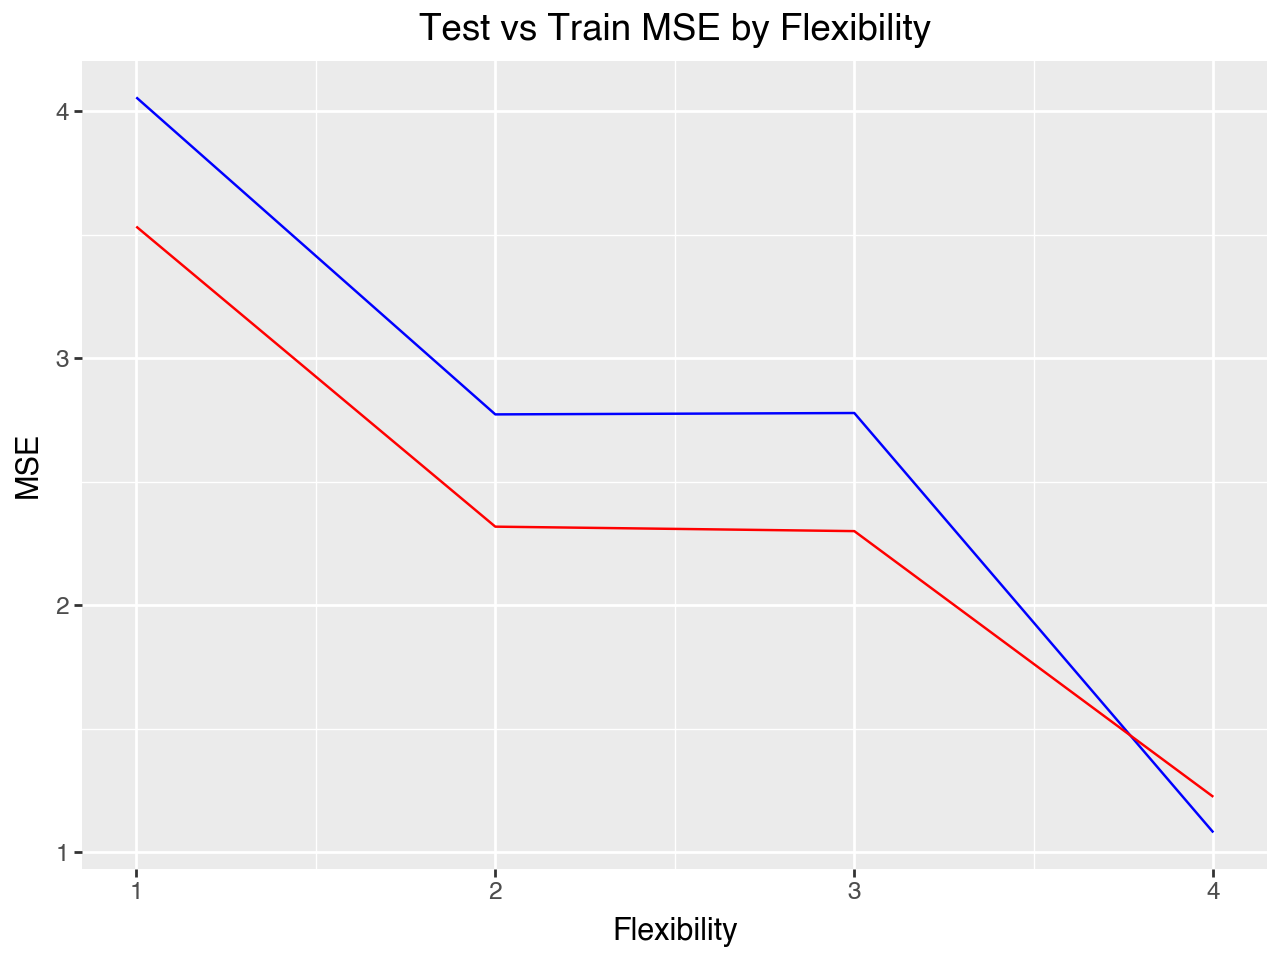

In [15]:

(ggplot(data, aes(x='Model')) +
    geom_line(aes(y="test_MSE"), color='blue') +
    geom_line(aes(y="train_MSE"), color='red') +
    labs(title='Test vs Train MSE by Flexibility', x='Flexibility', y='MSE')
)

Model 4 seems to be the best fit because it has the lowest MSE.